# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [194]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

pd.set_option("display.max_rows", None) # display all rows



# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


## **Setting Paths**

In [195]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("Data")

Health_data = DIR_DATA/"RW-Health-Data.xlsx"

# Population by enumeration area (EA) for Malawi
Pop_data = DIR_DATA/"Population data.csv"

# nightlights data
nightlights = DIR_DATA/"Nightlighs data.csv"



# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

## **Reading the access to health care excel workbook**

In [ ]:
dhs_mobile = pd.read_excel(Health_data, sheet_name="dhs-mobile_subnational_rwa")
access_to_health_care = pd.read_excel(Health_data, sheet_name="access-to-health-care_subnation")
child_mortality_rate = pd.read_excel(Health_data, sheet_name="child-mortality-rates_subnation")
dhs_mobile.tail()

## **Aggregating the key columns from the datasets**

In [ ]:
dhs_mobile = dhs_mobile[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index()
access_to_health_care = access_to_health_care[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index()
child_mortality_rate = child_mortality_rate[1:].groupby(["SurveyType","SurveyYear","Location","Indicator"])["Value"].mean().reset_index()

#renaming Vaue to mean_value
dhs_mobile = dhs_mobile.rename(columns={"Value":"Mean_value"})
access_to_health_care = access_to_health_care.rename(columns={"Value":"Mean_value"})
child_mortality_rate = child_mortality_rate.rename(columns={"Value":"Mean_value"})
dhs_mobile.tail()

## **Merging the aggregated datasets**

In [ ]:
subnational_survey_data = pd.concat([dhs_mobile, access_to_health_care, child_mortality_rate], ignore_index=True)

#csv_file = subnational_survey_data.to_csv("subnational_survey_data.csv")
subnational_survey_data.head()

## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

## **Reading datasets using Pandas**

In [198]:
nightlight = pd.read_csv(nightlights)
Pop_data = pd.read_csv(Pop_data)
# nightlight.head()


## **Population dataset variables**

In [199]:
#Population dataset variables
#Dependency ratio
working_age_population = Pop_data["general_2020"] - (Pop_data["elderly_60_plus_2020"] + Pop_data["children_under_five_2020"])
Pop_data['dependency_ratio'] = (Pop_data["elderly_60_plus_2020"] + Pop_data["children_under_five_2020"]) / working_age_population * 100

#people per building
people_per_building = Pop_data["general_2020"] / Pop_data["building_count"]
Pop_data['people_per_building'] = people_per_building
Pop_data["working_age_population"] = working_age_population



## **Nightlight Dataset Variables**


In [ ]:

night_light = nightlight[nightlight["year"].isin([2015, 2024])]

night_light = night_light.sort_values(["prov_name", "dist_name", "sect_name", "cell_name", "year"])

# percentage change in total nightlight from 2015-2024
night_light["nightlight_change"] = (
    night_light.groupby(["prov_name", "dist_name", "sect_name", "cell_name"])["total_nightlight"]
    .pct_change() * 100
)

#percentage change mean nightlight from 2015-2024
night_light["mean_nightlight_change"] = (
    night_light.groupby(["prov_name", "dist_name", "sect_name", "cell_name"])["mean_nightlight"].pct_change() * 100)

night_light["lit_pixel_percentage"] = night_light["lit_pixel_count"] / night_light["pixel_count"] * 100

night_light.head()


## **Merged dataset**

In [201]:
# merge datasets 
#First renaming the common columns
pd.set_option("display.max_columns", None)

#Pop_data = Pop_data.rename(columns={"prov_name": "province", "dist_name": "district", "sect_name": "sector", "cell_name": "cell"})
#night_light = night_light.rename(columns={"prov_name": "province", "dist_name": "district", "sect_name": "sector", "cell_name": "cell"})

nightlight_columns_to_merge = list(night_light.columns)

nightlight_columns_to_merge = [nightlight_columns_to_merge[0]] + nightlight_columns_to_merge[8:] #list from nightlight dataset to merge
merged_pop_nightlight_data = pd.merge(Pop_data, night_light[nightlight_columns_to_merge], on=["cell_id"], how="inner")

merged_pop_nightlight_data["Population_density"] = merged_pop_nightlight_data["general_2020"] / merged_pop_nightlight_data["pixel_count"]


## **Inflastructre index calculation**
#### **variables to measures infrastructure are*:
1. **"building_count"** #proxy for infrastructure → benefit (higher is better).
2. **"total_night_light"** #proxy for electrification/economic activity → benefit (higher is better).
### weights are under the assumptions that lit
### weights = [0.3, 0.7]

In [ ]:
# infrastructure index calculation

# calculating buildings and nightlights per square kilometer
merged_pop_nightlight_data["buildings_per_km2"] = merged_pop_nightlight_data["building_count"] / (merged_pop_nightlight_data["pixel_count"] + 1e-6)
merged_pop_nightlight_data["nightlights_per_km2"] = merged_pop_nightlight_data["total_nightlight"] / (merged_pop_nightlight_data["pixel_count"] + 1e-6)

# log transform
merged_pop_nightlight_data["log_building_count"] = np.log1p(merged_pop_nightlight_data["buildings_per_km2"])
merged_pop_nightlight_data["log_total_night_light"] = np.log1p(merged_pop_nightlight_data["nightlights_per_km2"])
# #merged_pop_nightlight_data["log_population_density"] = np.log1p(merged_pop_nightlight_data["Population_density"])

# Normalizing to 0-1
merged_pop_nightlight_data["norm_log_building_count"] = (merged_pop_nightlight_data["log_building_count"] - merged_pop_nightlight_data["log_building_count"].min()) / (merged_pop_nightlight_data["log_building_count"].max() - merged_pop_nightlight_data["log_building_count"].min())
merged_pop_nightlight_data["norm_log_total_night_light"] = (merged_pop_nightlight_data["log_total_night_light"] - merged_pop_nightlight_data["log_total_night_light"].min()) / (merged_pop_nightlight_data["log_total_night_light"].max() - merged_pop_nightlight_data["log_total_night_light"].min())

# Applying weights
merged_pop_nightlight_data["infrastructure_index"] = 0.3 * merged_pop_nightlight_data["norm_log_building_count"] + 0.7 * merged_pop_nightlight_data["norm_log_total_night_light"]

# Top 10 districts with highest infrastructure index
districts_with_highest_infrastructure = merged_pop_nightlight_data.groupby(["province_name", "district_name"])["infrastructure_index"].mean().nlargest(10).reset_index()
districts_with_highest_infrastructure

## **Correlation Analysis**

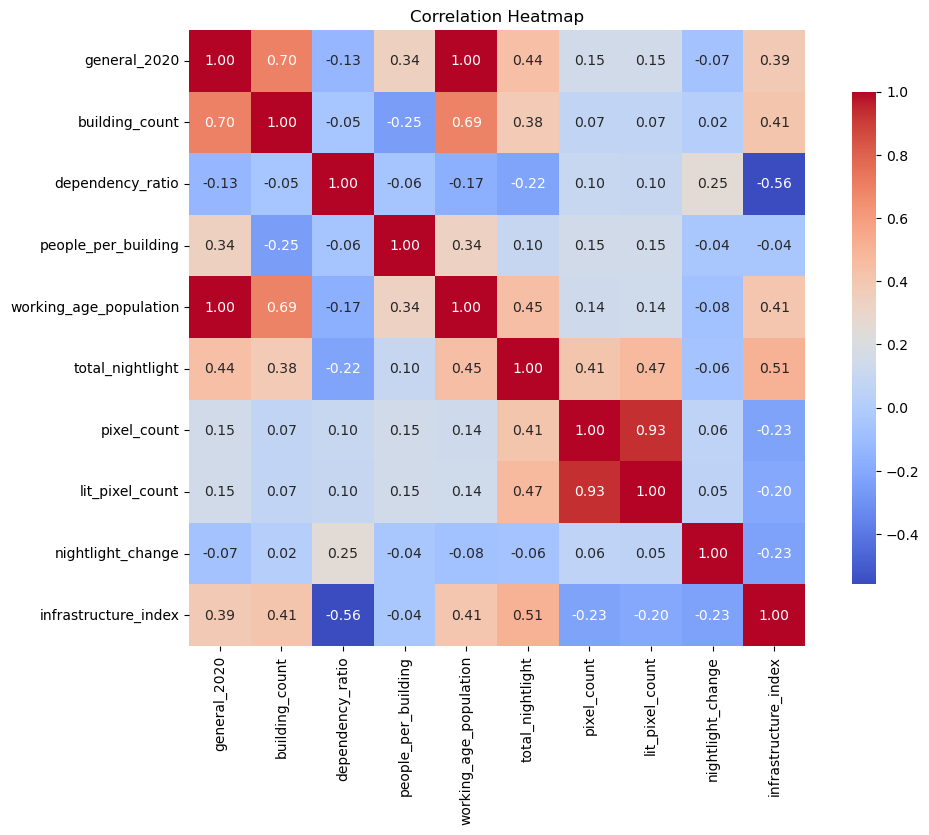

In [203]:
# Correlation heatmap
#Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables).
# Create a correlation heatmap
corr_heatmaplist = ['general_2020', 'building_count','dependency_ratio', 'people_per_building', 'working_age_population','total_nightlight', 'pixel_count','lit_pixel_count',"nightlight_change",
                    "infrastructure_index"]

plt.figure(figsize=(12, 8))

correlation_matrix = merged_pop_nightlight_data[corr_heatmaplist].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

===============================================================================
## **top 3 variable pairs** with the highest correlations and interpret their relationships.
1. **general_2020** and **building_count**  ## as population grows, also buildings increases to accommodate growing population
2. **working_age_population** and **building_count**
3. **Infrastructure index** and **Total nightlights** ## the index increases with nightlights wich indicates that places with higher index are more developed in terms of infracture.
------------------------------------
## **identified unexpected potential correlations**
1. **Working_age_population** and **Total_night_ligh**
**it's quite not clear how increase in the working age population goes to gether with rise in total nightlight**
============================================================================


# **Nightlight Trend Analysis**

1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

In [204]:
#District Rankings
#Top 5 districts with the highest nightlight growth (2015-2024)

top_5_districts = merged_pop_nightlight_data.groupby("district_name")["nightlight_change"].mean().nlargest(5).reset_index()

top_5_districts["nightlight_change"] = top_5_districts["nightlight_change"].round(2) # formating by rounding to two decimal numbers

top_5_districts 

,district_name,nightlight_change
0,Nyaruguru,877.42
1,Nyagatare,757.48
2,Bugesera,716.35
3,Kirehe,639.04
4,Ngoma,623.51


## **Bottom 5 districts with high nightlight_change**

In [205]:
Bottom_5_districts = merged_pop_nightlight_data.groupby("district_name")["nightlight_change"].mean().nsmallest(5).reset_index()

Bottom_5_districts["nightlight_change"] = Bottom_5_districts["nightlight_change"].round(2) # formating by rounding to two decimal numbers

Bottom_5_districts

,district_name,nightlight_change
0,Nyarugenge,192.75
1,Rubavu,318.38
2,Kicukiro,387.78
3,Muhanga,390.76
4,Nyanza,399.03


## **Top districts with high lit_pixel**

In [206]:
#Lit Pixel Analysis
lit_pixel_analysis_high = merged_pop_nightlight_data.groupby("district_name")["lit_pixel_percentage"].mean().nlargest(5).reset_index()
lit_pixel_analysis_high["lit_pixel_percentage"] = lit_pixel_analysis_high["lit_pixel_percentage"].round(2) # formating by rounding to two decimal numbers
lit_pixel_analysis_high

,district_name,lit_pixel_percentage
0,Kamonyi,44.84
1,Nyaruguru,44.78
2,Nyanza,44.46
3,Gisagara,44.17
4,Kayonza,44.05


## **Bottom Districts with smallest lit_pixel**

In [207]:
lit_pixel_analysis_smallest = merged_pop_nightlight_data.groupby("district_name")["lit_pixel_percentage"].mean().nsmallest(5).reset_index()
lit_pixel_analysis_smallest["lit_pixel_percentage"] = lit_pixel_analysis_smallest["lit_pixel_percentage"].round(2) # formating by rounding to two decimal numbers
lit_pixel_analysis_smallest

,district_name,lit_pixel_percentage
0,Nyarugenge,28.87
1,Kicukiro,34.23
2,Rusizi,37.92
3,Gicumbi,38.29
4,Rubavu,38.49


## **#Create visualizations showing nightlight trends for these extreme districts**

C:\Users\andrew.mushokambere\AppData\Local\Temp\ipykernel_12460\1207601046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=districts_and_nightlight_changes, x="nightlight_change", y="district_name", palette="viridis")
C:\Users\andrew.mushokambere\AppData\Local\Temp\ipykernel_12460\1207601046.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=districts_and_nightlight_changes, x="lit_pixel_percentage", y="district_name", palette="viridis")


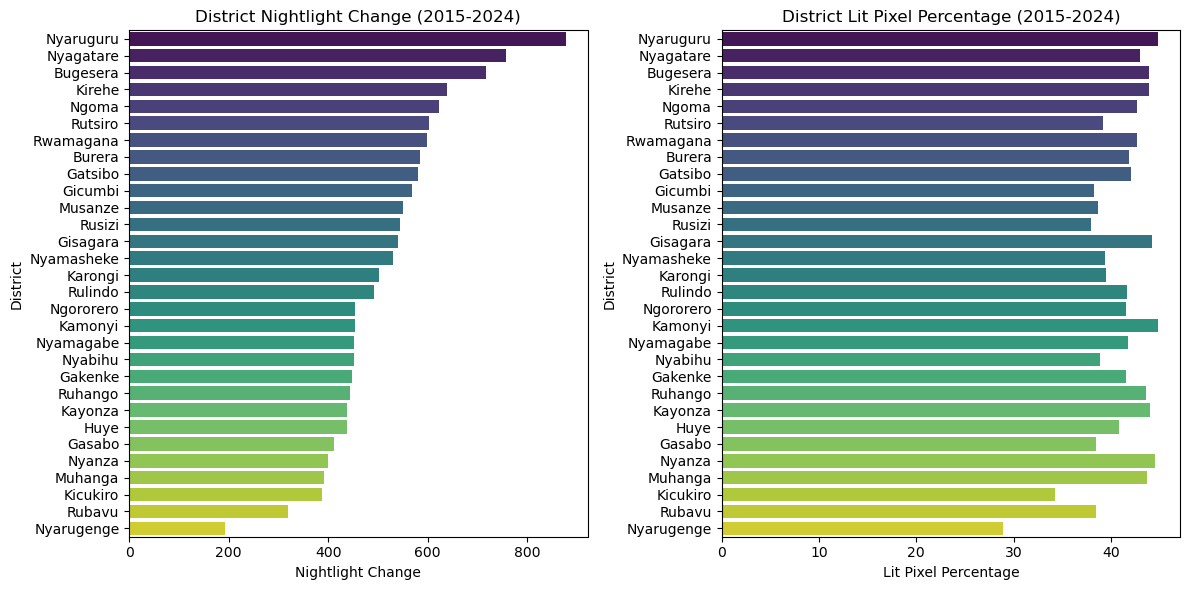

In [208]:
#Create visualizations showing nightlight trends for these extreme districts
districts_and_nightlight_changes = merged_pop_nightlight_data.groupby("district_name")[["nightlight_change","lit_pixel_percentage"]].mean().reset_index()
districts_and_nightlight_changes.sort_values(by="nightlight_change", ascending=False, inplace=True)
#districts_and_nightlight_changes.sort_values(by="lit_pixel_percentage", ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=districts_and_nightlight_changes, x="nightlight_change", y="district_name", palette="viridis")
plt.title("District Nightlight Change (2015-2024)")
plt.xlabel("Nightlight Change")
plt.ylabel("District")

plt.subplot(1, 2, 2)
sns.barplot(data=districts_and_nightlight_changes, x="lit_pixel_percentage", y="district_name", palette="viridis")
plt.title("District Lit Pixel Percentage (2015-2024)")
plt.xlabel("Lit Pixel Percentage")
plt.ylabel("District")


plt.tight_layout()
plt.show()



## **PART C: Modeling**

### **data cleaning and wrangling before modeling**

In [209]:
# data cleaning and wrangling before modeling
merged_pop_nightlight_data.fillna(0, inplace=True)  # Fill NaN values with 0
merged_pop_nightlight_data.dropna(subset=["infrastructure_index"], inplace=True)  # Drop rows where infrastructure index is NaN
#merged_pop_nightlight_data["people_per_building"] = merged_pop_nightlight_data["people_per_building"].replace(0, np.nan)

### **#Multivariate linear regression model predicting population density**

In [210]:
#Multivariate linear regression model predicting population density

# Selecting relevant features
exog_val = merged_pop_nightlight_data[["general_2020", "building_count","total_nightlight", "pixel_count", "lit_pixel_count", "infrastructure_index",
                                       "dependency_ratio","working_age_population"]]
y = merged_pop_nightlight_data["Population_density"]

def multivariate_regression_model(x, y):
    """
    Function to perform multivariate regression analysis.
    
    Parameters:
    x (DataFrame): Independent variables.
    y (Series): Dependent variable.
    
    Returns:
    model_summary: Summary of the regression model.
    """
    # Adding a constant term for the intercept
    x = sm.add_constant(x)

    # Fitting the model
    model = sm.OLS(y, x).fit()

    results_df = pd.DataFrame({
    "coef": model.params,
    "std_err": model.bse,
    "t": model.tvalues,
    "p>|t|": model.pvalues,
    "conf_low": model.conf_int()[0],
    "conf_high": model.conf_int()[1]
})

    # Model summary
    return results_df.round(4)

multivariate_regression_model(exog_val, y)



,coef,std_err,t,p>|t|,conf_low,conf_high
const,-191.4079,13.7401,-13.9306,0.0000,-218.3456,-164.4702
general_2020,-0.1654,0.0065,-25.5663,0.0000,-0.1781,-0.1527
building_count,-0.0330,0.0014,-23.2070,0.0000,-0.0358,-0.0302
total_nightlight,-0.8929,0.0238,-37.5237,0.0000,-0.9396,-0.8463
pixel_count,-0.0128,0.0100,-1.2859,0.1985,-0.0324,0.0067
lit_pixel_count,0.2628,0.0220,11.9309,0.0000,0.2196,0.3060
infrastructure_index,880.9337,13.4798,65.3522,0.0000,854.5065,907.3610
dependency_ratio,3.8520,0.5276,7.3006,0.0000,2.8176,4.8864
working_age_population,0.2179,0.0079,27.6967,0.0000,0.2025,0.2333


## **Variable Selection**

In [ ]:
#Selected variables
# 1. "general_2020"
# 2. "infrastructure_index"
# 3. "working_age_population"

## **Model Evaluation**

In [211]:
#reporting R squared, coefficients and statistical significance and interpreting results
multivariate_regression_model(merged_pop_nightlight_data[["general_2020","infrastructure_index","working_age_population"]], merged_pop_nightlight_data["Population_density"])

# Interpreting the results

"""
The results of the multivariate regression analysis provide insights into the relationships between the selected independent variables and the dependent variable (Population Density).

1. **R-squared**: This statistic indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R-squared value suggests a better fit for the model.

2. **Coefficients**: The coefficients represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. For example, if the coefficient for "general_2020" is 0.5, it suggests that a one-unit increase in "general_2020" is associated with a 0.5 unit increase in population density.

3. **Statistical Significance**: The p-values associated with each coefficient indicate whether the relationship is statistically significant. A common threshold for significance is 0.05. If a p-value is below this threshold, we can reject the null hypothesis 
and conclude that there is a significant relationship between the independent and dependent variables.

4. **Infrastructure Index**: The coefficient for the infrastructure index indicates its relationship with population density. the coefficient is positive,  therefore, it suggests that areas with better infrastructure tend to have higher population densities.

"""

'\nThe results of the multivariate regression analysis provide insights into the relationships between the selected independent variables and the dependent variable (Population Density).\n\n1. **R-squared**: This statistic indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R-squared value suggests a better fit for the model.\n\n2. **Coefficients**: The coefficients represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. For example, if the coefficient for "general_2020" is 0.5, it suggests that a one-unit increase in "general_2020" is associated with a 0.5 unit increase in population density.\n\n3. **Statistical Significance**: The p-values associated with each coefficient indicate whether the relationship is statistically significant. A common threshold for significance is 0.05. If a p-value is below this thres

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions